In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
raw = pd.read_csv('data.csv')
raw.columns = ['Benchmark', '0.003', '1', '0.03', '0', '0.3']
raw['Benchmark'] = raw['Benchmark'].str.upper()
raw

Benchmark     0.003        1      0.03         0       0.3
0        BS  0.001480  0.00146  0.001490  0.001586  0.001520
1        KM  0.001540  0.00142  0.001573  0.001599  0.001570
2       BFS  1.000000  1.00000  1.000000  1.000000  1.000000
3       FIR  0.001391  0.00153  0.001534  0.001472  0.001470
4       FLW  0.001509  0.00143  0.001430  0.001540  0.001420
5        MT  0.001427  0.00151  0.001440  0.001440  0.001450
6        PR  1.000000  1.00000  1.000000  1.000000  1.000000
7        FW  0.001508  0.00143  0.001420  0.001528  0.001500
8        ST  0.001472  0.00154  0.001470  0.001520  0.001480
9        SC  0.001357  0.00141  0.001410  0.001728  0.001356

In [37]:
norm = raw
norm['0'] = norm['1']/norm['0']
norm['0.003'] = norm['1']/norm['0.003']
norm['0.03'] = norm['1']/norm['0.03']
norm['0.3'] = norm['1']/norm['0.3']
norm['1'] = norm['1']/norm['1']
norm

Benchmark     0.003    1      0.03         0       0.3
0        BS  0.986486  1.0  0.979866  0.920555  0.960526
1        KM  0.922078  1.0  0.902734  0.888055  0.904459
2       BFS  1.000000  1.0  1.000000  1.000000  1.000000
3       FIR  1.099928  1.0  0.997392  1.039473  1.040816
4       FLW  0.947773  1.0  1.000000  0.928571  1.007042
5        MT  1.058164  1.0  1.048611  1.048611  1.041379
6        PR  1.000000  1.0  1.000000  1.000000  1.000000
7        FW  0.948276  1.0  1.007042  0.935864  0.953333
8        ST  1.046338  1.0  1.047619  1.013158  1.040541
9        SC  1.039057  1.0  1.000000  0.815972  1.039823

In [38]:
stack = norm.melt(id_vars=['Benchmark'], value_vars=['0', '0.003', '0.03', '0.3', '1'])
stack.columns=['Benchmark', 'Alpha', 'Speedup']
stack

Benchmark  Alpha   Speedup
0         BS      0  0.920555
1         KM      0  0.888055
2        BFS      0  1.000000
3        FIR      0  1.039473
4        FLW      0  0.928571
5         MT      0  1.048611
6         PR      0  1.000000
7         FW      0  0.935864
8         ST      0  1.013158
9         SC      0  0.815972
10        BS  0.003  0.986486
11        KM  0.003  0.922078
12       BFS  0.003  1.000000
13       FIR  0.003  1.099928
14       FLW  0.003  0.947773
15        MT  0.003  1.058164
16        PR  0.003  1.000000
17        FW  0.003  0.948276
18        ST  0.003  1.046338
19        SC  0.003  1.039057
20        BS   0.03  0.979866
21        KM   0.03  0.902734
22       BFS   0.03  1.000000
23       FIR   0.03  0.997392
24       FLW   0.03  1.000000
25        MT   0.03  1.048611
26        PR   0.03  1.000000
27        FW   0.03  1.007042
28        ST   0.03  1.047619
29        SC   0.03  1.000000
30        BS    0.3  0.960526
31        KM    0.3  0.904459
32       BFS    0.3  1.000000
33       FIR    0.3  1.040816
34       FLW    0.3  1.007042
35        MT    0.3  1.041379
36        PR    0.3  1.000000
37        FW    0.3  0.953333
38        ST    0.3  1.040541
39        SC    0.3  1.039823
40        BS      1  1.000000
41        KM      1  1.000000
42       BFS      1  1.000000
43       FIR      1  1.000000
44       FLW      1  1.000000
45        MT      1  1.000000
46        PR      1  1.000000
47        FW      1  1.000000
48        ST      1  1.000000
49        SC      1  1.000000

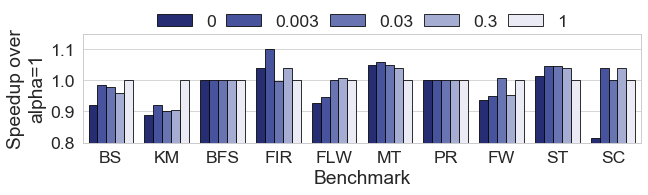

In [39]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stack, 
            x='Benchmark', hue='Alpha', y='Speedup', 
            palette=['#1A237E', '#3949AB', '#5C6BC0', '#9FA8DA', '#E8EAF6'], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.33), loc=9, ncol=5)
ax.set_ylabel('Speedup over\nalpha=1')
ax.set_yticks([0.8, 0.9, 1.0, 1.1])
ax.set_ylim(0.8, 1.15)

plt.savefig('alpha.pdf', bbox_inches='tight')
plt.show()
plt.close()